# Mosquitos in Chicago - Stats and Regression Analysis

#### Created By: Drewe MacIver

The following data analyses is on the West Nile Virus (WNV) Mosquito Test dataset. 

The Chicago Department of Public Health maintains an environmental surveillance program for West Nile Virus (WNV). This program includes the collection of mosquitoes from traps located throughout the city; the identification and sorting of mosquitoes collected from these traps; and the testing of specific species of mosquitoes for WNV.

#### Data Dictionary:

The following data is included in our analysis:

- **Year:**	Year that the WNV test is performed	*int64*		
- **Week:**	Week that the WNV test is performed	*int64*		
- **Address Block:**	Address of the location of trap.	*string*				
- **Trap:**	Id of the trap	*string*	
- **Trap type:**	Type of trap	*string*		
- **Date:**	Date and time that the WNV test is performed	*string*	Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- **Mosquito number:**	Number of mosquitoes caught in this trap	*int64*	Note: These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.			
- **WNV Present:**	Whether West Nile Virus was present in these mosquitos	*string*		
- **Species:**	Mosquito species   *string*		
- **Lat:**	Latitude of trap   *float64*		
- **Lon:**	Longitude of trap   *float64*

# Document Outline:

**This document is separated in to three sections:**

### Part 1 - Basic Analysis
### Part 2 - Statistical Analysis
### Part 3 - Linear Regression
### Part 4 - Logistic Regression

**Notebook Preparation: installing libraries and downloading .csv data**

In [234]:
# installing Data Science libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

!pip install watermark
from watermark import watermark
print(watermark(packages="numpy,pandas,matplotlib,seaborn,scipy,statsmodels"))

numpy      : 1.24.3
pandas     : 2.0.3
matplotlib : 3.7.2
seaborn    : 0.12.2
scipy      : 1.11.1
statsmodels: 0.14.0



In [235]:
# the data for this study was saved in a .csv file, and is imported here.  

df = pd.read_csv('mosquito_data_part_2.csv')

# Part 1 - Basic Analysis

1.1 Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

1.2 What is the average number of mosquitoes for each month? What trends do you notice?

In [236]:
# What is the current column data type for "WNV Present" - it is a string/object.

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


### 1.1a Here we're converting the "WNV Present" column to a boolean / binary one.  

In [237]:
df["WNV Present"].value_counts() # the "WNV Present" column has two values, Positive and Negative.  This can be truned into a boolean column

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64

In [238]:
# Creates a copy of the original dataframe so that any changes can be reversed.

df1 = df 

In [239]:
# turns the "WNV Present" column into a boolean one.

df1["WNV Present"] = df["WNV Present"] == "positive"  
df1 # checking to be sure this was done.  WNV Present is listing True/False values.  This confirms that it has been changed ot a boolean column.

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,True,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,True,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,True,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,True,CULEX RESTUANS,41.919197,-87.664758,8


### 1.1b Creating dummy variables for the "Trap type" column.

In [100]:
# Let's first see what the number of variables is and what the distribution of values are.

df1["Trap type"].value_counts() # The "Trap type column" has 4 variables

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

In [229]:
# converting the column to dummy variables.  Turning these variables into boolean numerical values will allow us to do Regresion analysis on them later. 

tt_dumm = pd.get_dummies(df1["Trap type"]) # creating Trap type dummy variables.
tt_dumm.value_counts()

CDC    GRAVID  OVI    SENTINEL
False  True    False  False       17741
True   False   False  False         544
False  False   False  True          209
               True   False           1
Name: count, dtype: int64

In [230]:
# Dropping the "OVI Trap Type" column
selector = tt_dumm["OVI"] == True
tt_dumm = tt_dumm.loc[~selector,:] #resets the dataframe by the invert operator
tt_dumm.value_counts()

CDC    GRAVID  OVI    SENTINEL
False  True    False  False       17741
True   False   False  False         544
False  False   False  True          209
Name: count, dtype: int64

### 1.2 What is the average number of mosquitoes for each month? What trends do we notice?

In [34]:
# Average number of mosquitoes for each month.
monthly_average = df1.groupby(["Year", "Month"])["Mosquito number"].sum()

# Average for all years.
cross_year_average = monthly_average.groupby("Month").mean()

cross_year_average

Month
5       58.000000
6     2200.538462
7     4539.000000
8     6402.230769
9     2235.000000
10     302.500000
Name: Mosquito number, dtype: float64

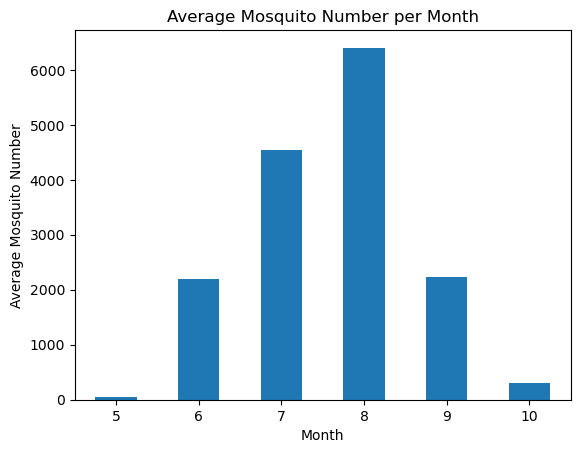

In [35]:
# The average number of Mosquitos caught, per month.

cross_year_average.plot(kind='bar') # cross_year_average variable can be found in the block of code preceeding this one. 
plt.xlabel('Month')
plt.ylabel('Average Mosquito Number')
plt.title('Average Mosquito Number per Month')
plt.xticks(rotation=0)
plt.show()


### 1.2 Findings:

The number of mosquitoes peaks at month 8, rising sharply after month 5 and rising gradually from months 6 thru 8.  It then drops significantly in both months 9 and 10.  There are a negligable number of mosquitoes in month 5.  The Mosquito season can reasonably be considered to begin in month 6 and end in month 10.

# Part 2 - Statistical Analysis

2.1 Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

2.2 Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

## 2.1 Approach:

2.1 Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?
- We will first find the rates of WNV Positivity for each species.  
- Then we will run Chi-Squared for Contingency test to determine if there is a statistically significant difference in the WNV positivity rate between mosquito species. 

In [114]:
# the mean of Positive WNV for each species

df1.groupby("Species")["WNV Present"].mean() 

Species
CULEX PIPIENS       0.257382
CULEX RESTUANS      0.215490
CULEX SALINARIUS    0.048673
CULEX TERRITANS     0.015267
Name: WNV Present, dtype: float64

In [248]:
df1.groupby(["Species", "WNV Present"])["Mosquito number"].sum().to_frame().reset_index()

,Species,WNV Present,Mosquito number
0,CULEX PIPIENS,False,30156
1,CULEX PIPIENS,True,31208
2,CULEX RESTUANS,False,83562
3,CULEX RESTUANS,True,54024
4,CULEX SALINARIUS,False,433
5,CULEX SALINARIUS,True,31
6,CULEX TERRITANS,False,1776
7,CULEX TERRITANS,True,34


In [256]:
chi_data = {"CULEX PIPIENS": [30156, 31208],
            "CULEX RESTUANS": [83562, 54024],
            "CULEX SALINARIUS": [433, 31],
            "CULEX TERRITANS": [1776, 34]}
chi_df = pd.DataFrame(chi_data, index = [False, True])
display(chi_df)

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
False,30156,83562,433,1776
True,31208,54024,31,34


In [262]:
stats.chi2_contingency(chi_df)

Chi2ContingencyResult(statistic=3810.1473492550344, pvalue=0.0, dof=3, expected_freq=array([[35352.36566215, 79264.56199062,   267.31467419,  1042.75767304],
       [26011.63433785, 58321.43800938,   196.68532581,   767.24232696]]))

### Findings:

The Chi-Squared statistic is 3810 and the p-value is 0.  This confirms that there is a statistically significant differnce in the WNV positivity rate between mosquito Species. 

## 2.2 Approach:

2.2 Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

- 2.2.1 - First determine what the correlations are between "Mosquito number" and the current numerical values.
- 2.2.2 - Then change all categorical columns to Dummy Variables (or some other conversion to a numberic column) and concatonate them into a single table.
- 2.2.3 - Run the .corr() correlation again on the Mosquito Number column to check for correlation.
- 2.2.4 - Run an appropriate statistical analysis on the correlations to determine if they are statisticaly significant.  

### 2.2.1a What the correlations are between "Mosquito number" and the current numerical values?

A more comprehensive correlation analysis (with dummy variables included) can be found further down in "2.2.1b". 

In [265]:
# creating a dataframe of just numerical datatypes

df_numerical = df1.select_dtypes("number")

In [266]:
# finding the correlation of these numerical datatypes with "Mosquito number"

df_numerical.corr()["Mosquito number"].sort_values(ascending=False).to_frame()

,Mosquito number
Mosquito number,1.000000
Year,0.129326
Lat,0.096820
Week,-0.033900
Month,-0.040426
Lon,-0.151421


### Findings:

With the pre-existing numerical columns, the columns that positively correlate with the number of mosquitoes caught are Year and Lat.  The columns that are negatively correlated are Week, Month, and Lon.

### 2.2.2 Change all categorical columns to dummy variables.

In [152]:
# before turning them into dummy variables, first let's examine all of our "object" variables.

to_check = df1.select_dtypes("object") # selects all "object" data types

for col in to_check.columns:
    series = to_check[col]
    vc = series.value_counts()
    print(vc)
    print("-" * 80)

Address Block
100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: count, Length: 154, dtype: int64
--------------------------------------------------------------------------------
Trap
T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: count, Length: 190, dtype: int64
--------------------------------------------------------------------------------
Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64
--------------------------------------------------------------------------------
Date
2016-08-11 00:08:00    244
2016-08-04 00:

# Data Conversions (creating dummy variables)

We performed the following data conversions with our original data:

- Year             **kept in place** 
- Week             **kept in place**  
- Address Block    **fully dummy encoded** (as add_dummies) 
- Trap             **fully dummy encoded** (as trap_dummies) 
- Trap type        **fully dummy encoded** (as trap_type_dummies)
- Date             **fully dummy encoded** (as date_dummies) 
- Mosquito number  **kept in place**   
- WNV Present      **kept in place**    
- Species          **fully dummy encoded** (as species_dummies) 
- Lat              **kept in place** 
- Lon              **kept in place** 
- Month            **kept in place**   

In [48]:
# creating dummy variables for the column "Address Block"

add_dummies = pd.get_dummies(df1["Address Block"]).astype(int)

In [49]:
# creating dummy variables for the column "Trap"

trap_dummies = pd.get_dummies(df1["Trap"]).astype(int)

In [50]:
# creating dummy variables for the column "Trap type"

trap_type_dummies = pd.get_dummies(df1["Trap type"]).astype(int)

In [51]:
# creating dummy variables for the column "Date"

date_dummies = pd.get_dummies(df1["Date"]).astype(int)

In [52]:
# creating dummy variables for the column "Species"

species_dummies = pd.get_dummies(df1["Species"]).astype(int)

### 2.2.2 ctd... Concatonating dummy variables into a single dataframe.

In [53]:
# here we're creating a dataframe for all dummy variables 

combined = pd.concat([df1,add_dummies,trap_dummies,trap_type_dummies,date_dummies,species_dummies],axis='columns')
combined

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,...,2019-08-22 00:08:00,2019-08-29 00:08:00,2019-09-05 00:09:00,2019-09-12 00:09:00,2019-09-19 00:09:00,2019-09-26 00:09:00,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,...,0,0,0,0,0,1,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,...,0,0,0,0,0,1,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,...,0,0,0,0,0,1,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,...,0,0,0,0,0,1,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,True,CULEX PIPIENS,41.857843,...,0,0,0,0,0,0,1,0,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,True,CULEX PIPIENS,41.965376,...,0,0,0,0,0,0,1,0,0,0
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,True,CULEX RESTUANS,41.662395,...,0,0,0,0,0,0,0,1,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,True,CULEX RESTUANS,41.919197,...,0,0,0,0,0,0,0,1,0,0


In [267]:
# We're also creating a dataframe with fewer dummy variables in it, for simpler analyses later.
# The number of Dummy Variables for Address Block, Trap, and Date make further analysis difficult.
# This table does NOT include those dummy variables. 

comb_less = pd.concat([df1,trap_type_dummies,species_dummies],axis='columns')
comb_less

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,True,CULEX PIPIENS,41.857843,-87.635858,9,0,1,0,0,1,0,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,True,CULEX PIPIENS,41.965376,-87.758403,8,0,1,0,0,1,0,0,0
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,True,CULEX RESTUANS,41.662395,-87.590176,7,0,1,0,0,0,1,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,True,CULEX RESTUANS,41.919197,-87.664758,8,0,0,0,1,0,1,0,0


In [268]:
# here we're removing the columns of datatype "object", as these have now all been turned into Dummy Varibales.

final = combined.select_dtypes(exclude="object")
final

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,100XX W OHARE,100XX W OHARE AIRPORT,101XX S STONY ISLAND AVE,...,2019-08-22 00:08:00,2019-08-29 00:08:00,2019-09-05 00:09:00,2019-09-12 00:09:00,2019-09-19 00:09:00,2019-09-26 00:09:00,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,False,41.977738,-87.880969,9,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2019,39,1,False,41.798211,-87.736925,9,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2019,39,2,False,41.987245,-87.689417,9,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2019,39,1,False,41.953664,-87.724987,9,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2019,39,9,False,41.657069,-87.546049,9,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,4,True,41.857843,-87.635858,9,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18491,2007,34,19,True,41.965376,-87.758403,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18492,2016,30,34,True,41.662395,-87.590176,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18493,2017,33,50,True,41.919197,-87.664758,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [269]:
# here we're removing the columns of datatype "object", as these have now all been turned into Dummy Varibales.

final_less = comb_less.select_dtypes(exclude="object")
final_less

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,False,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,1,False,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,2,False,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,1,False,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,9,False,41.657069,-87.546049,9,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,4,True,41.857843,-87.635858,9,0,1,0,0,1,0,0,0
18491,2007,34,19,True,41.965376,-87.758403,8,0,1,0,0,1,0,0,0
18492,2016,30,34,True,41.662395,-87.590176,7,0,1,0,0,0,1,0,0
18493,2017,33,50,True,41.919197,-87.664758,8,0,0,0,1,0,1,0,0


### Update:

We now have two dataframes:

**final:** which contains all of our preexisting numerical data, combined with all of our categorical data turned into dummy variables.

**final_less:** which contains all of our preexisting numerical data, combined with only the following categorical columns that have been turned into dummy variables: "Species" "Trap type" "WNV Present".

### 2.2.1b Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [273]:
final_less.corr()["Mosquito number"].sort_values(ascending=False).to_frame()

,Mosquito number
Mosquito number,1.000000
WNV Present,0.408034
Year,0.129326
SENTINEL,0.108575
Lat,0.096820
CDC,0.094147
CULEX RESTUANS,0.070999
CULEX PIPIENS,0.014730
OVI,-0.005392
Week,-0.033900


### Findings:

The five columns that positively correlate with "Mosquito number" the most (in descending order) are "WNV Present", "Year", "Sentinel" (a Trap type), "Lat" and "CDC" (a Trap type).

The five columns that negatively correlate with "Mosquite number" the most (in acending order, from most negatively correlated to least) are "Lon" "CULEX TERRITANS" (a mosquito Species), "GRAVID" (a Trap type), "CULEX SALINARIUS" (a mosquito Species), and "Month".

In [93]:
# Pearson R Test for correlation

for col in final_less.columns:  # looping thru each column of the final_less dataframe
    r,p = stats.pearsonr(final_less[col],final_less["Mosquito number"]) # the outputs of the pearsonr test are r and p
    print(col, "r={:4.3f} p={:4.3f}".format(r,p))

Year r=0.129 p=0.000
Week r=-0.034 p=0.000
Mosquito number r=1.000 p=0.000
WNV Present r=0.408 p=0.000
Lat r=0.097 p=0.000
Lon r=-0.151 p=0.000
Month r=-0.040 p=0.000
CDC r=0.094 p=0.000
GRAVID r=-0.138 p=0.000
OVI r=-0.005 p=0.463
SENTINEL r=0.109 p=0.000
CULEX PIPIENS r=0.015 p=0.045
CULEX RESTUANS r=0.071 p=0.000
CULEX SALINARIUS r=-0.073 p=0.000
CULEX TERRITANS r=-0.151 p=0.000


### Findings (statistical signifigance)

All of the columns were statistically significant in their correlation with Mosquito number, except for the "Trap type" OVI.

### Heatmap of Correlations

Below is a heatmap of the correlations of variables in the final_less table.

<Axes: >

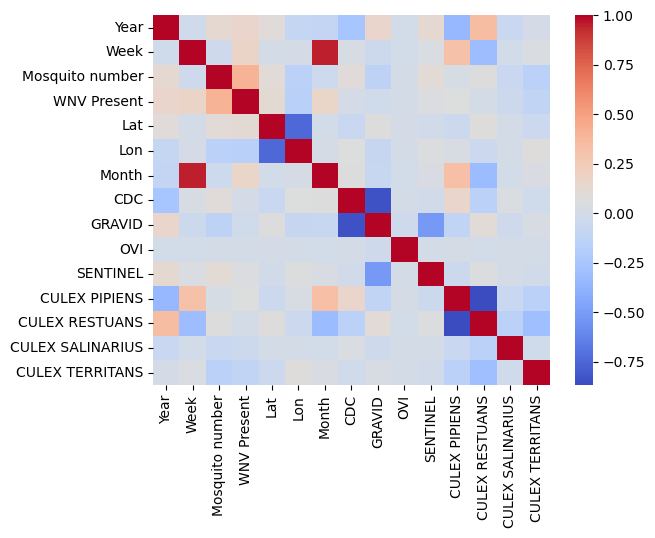

In [270]:
sns.heatmap(final_less.corr(),cmap='coolwarm')

# Part 3: Linear Regression Analysis

The following is our linear regression analysis, predicting Mosquito number.

Our variables include the dummy variables of our original dataset.  The columns "Date" and "Address Block" and "Trap" have been excluded.  

Why were these variables excluded?

"Date", "Address Block" and "Trap" variables were excluded as they resulted in too many dummy variables (298, 154, and 190 dummy variables, respectively).  It would be interesting to run this model with them included, but due to time constraints their inclusion in this iteration of this report is not feasable. 

### Linear Regression Analysis #1 (CHAMPION)

In [274]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X1 = final_less[['Year', 'Week', 'Lat', 'Lon', 'Month',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS']]
y1 = final_less["Mosquito number"]

In [275]:
# Adding a constant to our X variable

X_withconstant1 = sm.add_constant(X1)

In [122]:
# Running the linear regression model: 

# 1. Instantiate Model
regression1 = sm.OLS(y1, X_withconstant1) # the sum of least squares (OLS) function, y before X

# 2. Fit Model
regression1_results = regression1.fit() # the .fit function

# Looking at the summary
regression1_results.summary() # listing a summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     171.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:07:50   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18483   BIC:                         1.470e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2003.4555     74.302    -26.964      0.000   -2149.094   -1857.817
Year                 0.5333      0.029     18.425      0.000       0.477       0.590
Week                -0.0762      0.072     -1.065      0.287      -0.216       0.064
Lat                 -4.8662      1.239     -3.928      0.000      -7.294      -2.438
Lon                -24.5167      1.503    -16.314      0.000     -27.462     -21.571
Month               -0.3356      0.311     -1.080      0.280      -0.945       0.273
CDC               -493.3875     18.713    -26.366      0.000    -530.066    -456.709
GRAVID            -504.3811     18.778    -26.860      0.000    -541.188    -467.574
OVI               -514.3623     21.192    -24.271      0.000    -555.901    -472.824
SENTINEL          -491.3246     18.785    -26.154      0.000    -528.146    -454.503
CULEX PIPIENS     -495.7856     18.567    -26.702      0.000    -532.179    -459.392
CULEX RESTUANS    -497.0422     18.603    -26.718      0.000    -533.506    -460.578
CULEX SALINARIUS  -505.5478     18.584    -27.204      0.000    -541.973    -469.122
CULEX TERRITANS   -505.0798     18.567    -27.203      0.000    -541.473    -468.686
==============================================================================
Omnibus:                     4534.845   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8986.296
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     1.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.47e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Findings:

This test resulted in an adjsuted r-Squared of 0.092.  This is a very weak correlation. 

The resutls of this test also indicate that the independent variables "Week" and "Month" do not have a statistically significant relationship with the dependent variable.

We will run this test again, without the "Week" and "Month" variables.

### Linear Regression Analysis #2

With the independent variables "Week" and "Month" removed from the previous regression test.

In [225]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X7 = final_less[['Year', 'Lat', 'Lon',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS']]
y7 = final_less["Mosquito number"]

In [226]:
# Adding a constant to our X variable

X_withconstant7 = sm.add_constant(X7)

In [227]:
# Running the linear regression model: 

# 1. Instantiate Model
regression7 = sm.OLS(y7, X_withconstant7) # the sum of least squares (OLS) function, y before X

# 2. Fit Model
regression7_results = regression7.fit() # the .fit function

# Looking at the summary
regression7_results.summary() # listing a summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:01:45   Log-Likelihood:                -73469.
No. Observations:               18495   AIC:                         1.470e+05
Df Residuals:                   18485   BIC:                         1.470e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1992.8137     73.881    -26.973      0.000   -2137.628   -1848.000
Year                 0.5228      0.028     18.533      0.000       0.468       0.578
Lat                 -4.9779      1.240     -4.014      0.000      -7.408      -2.547
Lon                -24.5765      1.504    -16.336      0.000     -27.525     -21.628
CDC               -491.0387     18.607    -26.390      0.000    -527.511    -454.567
GRAVID            -501.9904     18.678    -26.876      0.000    -538.601    -465.380
OVI               -510.5291     21.099    -24.196      0.000    -551.886    -469.172
SENTINEL          -489.2554     18.686    -26.184      0.000    -525.881    -452.630
CULEX PIPIENS     -493.4183     18.464    -26.724      0.000    -529.608    -457.228
CULEX RESTUANS    -494.1492     18.496    -26.716      0.000    -530.404    -457.895
CULEX SALINARIUS  -502.7838     18.479    -27.208      0.000    -539.004    -466.563
CULEX TERRITANS   -502.4624     18.462    -27.216      0.000    -538.650    -466.275
==============================================================================
Omnibus:                     4567.255   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9095.861
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                       4.634   Cond. No.                     1.19e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.27e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Findings:

This test resulted in an adjsuted r-Squared of 0.090, performing slightly worse than our initial test result of r-Squared = 0.092.  This is a very weak correlation. 

We will use the linear regression #1 in our analysis of the distribution of residuals.

## Linear Regression (analysis of residuals for normality)

We will test the normality of the residuals to determine if our residuals are normally distributed.  

Residuals (the distance that the actual values observed in the data differ from the predicted values of our model) being normally distributed is a key assumption in linear regression.  Violating it could mean that our model is not as accurate as it could be (that our estimates are not as precise as they could be).

We will first plot a histogram of our residuals to visually check for normality.

Then we will use a Shapiro Wilks test. However, this test is sensitive to large sample sizes (eg., n > 5000).

We will then use a Q-Q plot.  

In [290]:
# using the .resid funciton to get residual values of our linear regression analysis.

model_resids1 = regression1_results.resid 

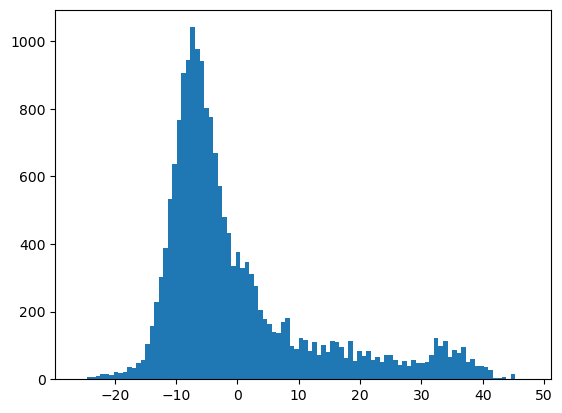

In [125]:
# Below is a plot of the residuals from our first regression test (regression1).

plt.figure()
plt.hist(model_resids1, bins = 100)
plt.show()

### Findings:

The above histogram suggests that the distribution of our residuals may be skewed to the left.  

We will run a Shapiro-Wilk test and a Q-Q plot to further investigate if our residuals are indeed normally distributed or not.  

In [127]:
# Shapiro-Wilk test

tstat, pval = stats.shapiro(model_resids1)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))

Shapiro-Wilk test on residuals: p-value = 0.000


/Users/drewe/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Findings:

The Shapiro-Wilk test has a p-value of 0 (< 0.05) which confirms that our residuals are normally distributed.

However, the Shapiro-Wilk test may not be accurate for sample sizes larger than 5000 (and this dataset has a sample size of 18,495).  

We will run a Q-Q plot of residuals to investigate further.

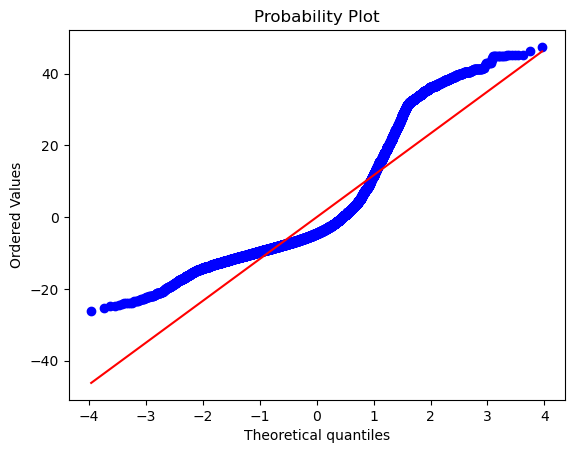

In [128]:
# Q-Q Plot of residuals from linear regression #1.

plt.figure()
stats.probplot(model_resids1, dist="norm", plot = plt);
plt.show()

### Findings:

The shape of this Q-Q plot indicates that our residuals are likely skewed to the left.  

It is my opinion that our residuals are NOT normally distributed and that this linear regression model is very weakly predictive.  It's R^2 value of 0.092 further supports this finding.  

# Part 4: Logistic Regression

## Logistic Regression Model #1 (co-CHAMPION)

Model iteration #1: including all "final_less" columns.

In [195]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X2 = final_less[['Mosquito number', 'Year', 'Week', 'Lat', 'Lon', 'Month',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS']]
y2 = final_less["WNV Present"]

In [196]:
# Adding a constant to our X variable

X_withconstant2 = sm.add_constant(X2)

In [197]:
# Running the logistic regression model: 

# 1. Instantiate model
mylogreg2 = sm.Logit(y2, X_withconstant2) # the Logit function, y before X

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results2 = mylogreg2.fit() # the .fit function  
mylogreg_results2.summary() # listing a summary

         Current function value: 0.405443
         Iterations: 35


/Users/drewe/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18481
Method:                           MLE   Df Model:                           13
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2229
Time:                        18:04:58   Log-Likelihood:                -7498.7
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -348.0178        nan        nan        nan         nan         nan
Mosquito number      0.0651      0.001     44.694      0.000       0.062       0.068
Year                 0.1130      0.007     16.467      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                -83.6866   1.23e+06  -6.78e-05      1.000   -2.42e+06    2.42e+06
GRAVID             -83.5309   1.23e+06  -6.77e-05      1.000   -2.42e+06    2.42e+06
OVI                -96.8753   1.23e+06  -7.85e-05      1.000   -2.42e+06    2.42e+06
SENTINEL           -83.9249   1.23e+06   -6.8e-05      1.000   -2.42e+06    2.42e+06
CULEX PIPIENS      -86.0707        nan        nan        nan         nan         nan
CULEX RESTUANS     -86.3208        nan        nan        nan         nan         nan
CULEX SALINARIUS   -87.0658        nan        nan        nan         nan         nan
CULEX TERRITANS    -88.5607        nan        nan        nan         nan         nan
====================================================================================
"""

#### The accuracy of this model is:

In [198]:
# getting predictions

prob_predictions2 = mylogreg_results2.predict(sm.add_constant(X2))
binary_predictions2 = np.where(prob_predictions2>0.5,1,0) # predictions with a > 50% liklihood of being correct are assigned a "1", all others are given a "0".

In [199]:
# Comparing the boolean correctness of our predictions 
# (above 50% liklihood counted as "1") to the presence or absense of 
# the dependent variable (y), and summing the instances when they are equal 
# (when a "correct" prediction is made).
# then we are dividing that by the total number of predictions.
# this returns the "accuracy rate" of the model (correct predictions / total predictions)

correct_pred2 = (binary_predictions2 == final_less["WNV Present"]).sum()
total_n2 = len(final_less["WNV Present"])

print("This model predicts ",correct_pred2," out of ",total_n2," samples, for an accuracy rate of", (correct_pred2 / total_n2)*100,"%")

This model predicts  15001  out of  18495  samples, for an accuracy rate of 81.10840767775073 %


## Logistic Regression Model #2  (co-CHAMPION)

Model iteration #2: Removing all "Species" columns.

In [277]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X4 = final_less[['Mosquito number', 'Year', 'Week', 'Lat', 'Lon', 'Month',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL']]
y4 = final_less["WNV Present"]

In [278]:
# Adding a constant to our X variable

X_withconstant4 = sm.add_constant(X4)

In [279]:
# Running the logistic regression model:  

# 1. Instantiate model
mylogreg4 = sm.Logit(y4, X_withconstant4) # the Logit function, y before X

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results4 = mylogreg4.fit() # the .fit function
mylogreg_results4.summary() # listing a summary

         Current function value: 0.410612
         Iterations: 35


/Users/drewe/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2130
Time:                        20:43:34   Log-Likelihood:                -7594.3
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -403.8214        nan        nan        nan         nan         nan
Mosquito number     0.0678      0.001     46.838      0.000       0.065       0.071
Year                0.0999      0.006     15.953      0.000       0.088       0.112
Week                0.1079      0.016      6.780      0.000       0.077       0.139
Lat                -0.7304      0.285     -2.564      0.010      -1.289      -0.172
Lon                -3.6637      0.333    -11.010      0.000      -4.316      -3.012
Month               0.2180      0.069      3.168      0.002       0.083       0.353
CDC               -95.4935        nan        nan        nan         nan         nan
GRAVID            -95.3710        nan        nan        nan         nan         nan
OVI              -117.1786        nan        nan        nan         nan         nan
SENTINEL          -95.7783        nan        nan        nan         nan         nan
===================================================================================
"""

#### The accuracy of this model is:

In [280]:
# getting predictions

prob_predictions4 = mylogreg_results4.predict(sm.add_constant(X4))
binary_predictions4 = np.where(prob_predictions4>0.5,1,0) # predictions with a > 50% liklihood of being correct are assigned a "1", all others are given a "0".

In [281]:
# Comparing the boolean correctness of our predictions 
# (above 50% liklihood counted as "1") to the presence or absense of 
# the dependent variable (y), and summing the instances when they are equal 
# (when a "correct" prediction is made).
# then we are dividing that by the total number of predictions.
# this returns the "accuracy rate" of the model (correct predictions / total predictions)


correct_pred4 = (binary_predictions2 == final_less["WNV Present"]).sum()
total_n4 = len(final_less["WNV Present"])

print("This model predicts ",correct_pred4," out of ",total_n4," samples, for an accuracy rate of", (correct_pred4 / total_n4)*100,"%")

This model predicts  15001  out of  18495  samples, for an accuracy rate of 81.10840767775073 %


## Logistic Regression Model #3

Model iteration #3: Removing all "Trap type" columns.

Reasoning:  Here I am playing around with removing some column types (at random) to see if there is any effect on the model accuracy.

In [205]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X3 = final_less[['Mosquito number', 'Year', 'Week', 'Lat', 'Lon', 'Month', 'CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']]
y3 = final_less["WNV Present"]

In [220]:
# Adding a constant to our X variable

X_withconstant3 = sm.add_constant(X3)

In [207]:
# Running the logistic regression model:

# 1. Instantiate model
mylogreg3 = sm.Logit(y3, X_withconstant3) # the Logit function, y before X

#2. Fit the model
mylogreg_results3 = mylogreg3.fit() # the .fit function
mylogreg_results3.summary()  # listing a summary 

Optimization terminated successfully.
         Current function value: 0.405627
         Iterations 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2225
Time:                        18:06:10   Log-Likelihood:                -7502.1
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -420.8336        nan        nan        nan         nan         nan
Mosquito number      0.0644      0.001     45.376      0.000       0.062       0.067
Year                 0.1131      0.007     17.080      0.000       0.100       0.126
Week                 0.1005      0.016      6.278      0.000       0.069       0.132
Lat                 -0.6694      0.286     -2.340      0.019      -1.230      -0.109
Lon                 -3.6321      0.333    -10.904      0.000      -4.285      -2.979
Month                0.2132      0.069      3.099      0.002       0.078       0.348
CULEX PIPIENS     -104.2710        nan        nan        nan         nan         nan
CULEX RESTUANS    -104.5207        nan        nan        nan         nan         nan
CULEX SALINARIUS  -105.2849        nan        nan        nan         nan         nan
CULEX TERRITANS   -106.7572        nan        nan        nan         nan         nan
====================================================================================
"""

#### The accuracy of this model is:

In [208]:
# getting predictions 

prob_predictions3 = mylogreg_results3.predict(sm.add_constant(X3))
binary_predictions3 = np.where(prob_predictions3>0.5,1,0) # predictions with a > 50% liklihood of being correct are assigned a "1", all others are given a "0".

In [209]:
# Comparing the boolean correctness of our predictions 
# (above 50% liklihood counted as "1") to the presence or absense of 
# the dependent variable (y), and summing the instances when they are equal 
# (when a "correct" prediction is made).
# then we are dividing that by the total number of predictions.
# this returns the "accuracy rate" of the model (correct predictions / total predictions)

correct_pred3 = (binary_predictions3 == final_less["WNV Present"]).sum()
total_n3 = len(final_less["WNV Present"])

print("This model predicts ",correct_pred3," out of ",total_n3," samples, for an accuracy rate of", (correct_pred3 / total_n3)*100,"%")

This model predicts  14987  out of  18495  samples, for an accuracy rate of 81.03271154366045 %


## Logistic Regression Model #4

Model iteration #4: Removing the "Month" and "Lat" columns.

Reasoning: the "Month" and the "Lat" columns had the highest p-values in the previous regression tests.  Removing them may increase the models effectiveness.  

In [210]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X5 = final_less[['Mosquito number', 'Year', 'Week', 'Lon',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS']]
y5 = final_less["WNV Present"]

In [211]:
# Adding a constant to our X variable

X_withconstant5 = sm.add_constant(X5)

In [212]:
# Running the logistic regression model: 

# 1. Instantiate model
mylogreg5 = sm.Logit(y5, X_withconstant5) # the Logit function, y before X

#2. Fit the model
mylogreg_results5 = mylogreg5.fit() # the .fit function
mylogreg_results5.summary()  # listing a summary

         Current function value: 0.405861
         Iterations: 35


/Users/drewe/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2221
Time:                        18:06:32   Log-Likelihood:                -7506.4
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -326.7639   7.85e+05     -0.000      1.000   -1.54e+06    1.54e+06
Mosquito number      0.0650      0.001     44.697      0.000       0.062       0.068
Year                 0.1092      0.007     16.142      0.000       0.096       0.122
Week                 0.1479      0.006     26.177      0.000       0.137       0.159
Lon                 -2.9586      0.214    -13.816      0.000      -3.378      -2.539
CDC                -78.5854        nan        nan        nan         nan         nan
GRAVID             -78.4702        nan        nan        nan         nan         nan
OVI                -90.8360        nan        nan        nan         nan         nan
SENTINEL           -78.8724        nan        nan        nan         nan         nan
CULEX PIPIENS      -80.7544        nan        nan        nan         nan         nan
CULEX RESTUANS     -81.0088        nan        nan        nan         nan         nan
CULEX SALINARIUS   -81.7526        nan        nan        nan         nan         nan
CULEX TERRITANS    -83.2484        nan        nan        nan         nan         nan
====================================================================================
"""

#### The accuracy of this model is:

In [213]:
# getting predictions

prob_predictions5 = mylogreg_results5.predict(sm.add_constant(X5))
binary_predictions5 = np.where(prob_predictions5>0.5,1,0) # predictions with a > 50% liklihood of being correct are assigned a "1", all others are given a "0".

In [214]:
# Comparing the boolean correctness of our predictions 
# (above 50% liklihood counted as "1") to the presence or absense of 
# the dependent variable (y), and summing the instances when they are equal 
# (when a "correct" prediction is made).
# then we are dividing that by the total number of predictions.
# this returns the "accuracy rate" of the model (correct predictions / total predictions)

correct_pred5 = (binary_predictions5 == final_less["WNV Present"]).sum()
total_n5 = len(final_less["WNV Present"])

print("This model predicts ",correct_pred5," out of ",total_n5," samples, for an accuracy rate of", (correct_pred5 / total_n5)*100,"%")

This model predicts  14994  out of  18495  samples, for an accuracy rate of 81.0705596107056 %


## Logistic Regression Model #5

Model iteration #5: Removing the "Month", "Lat" columns, as well as "OVI", "SENTINEL", "CULEX SALINARIUS", and "CULEX TERRITANS" columns.
Reasoning: the "Month" and the "Lat" columns had the highest p-values in the previous regression tests.  I am also removing the two Trap Types that had the fewest mosquitos caught ("OVI", "SENTINEL"), as well as the two mosquito species that had much lower WNV Possitivity rates ("CULEX SALINARIUS", "CULEX TERRITANS"). Removing them may increase the models effectiveness. 

In [215]:
# Here we are declaring our independent variables (X), and our dependent variable (y).

X6 = final_less[['Mosquito number', 'Year', 'Week', 'Lon',
       'GRAVID', 'CDC', 'CULEX PIPIENS', 'CULEX RESTUANS']]
y6 = final_less["WNV Present"]

In [216]:
# Adding a constant to our X variable

X_withconstant6 = sm.add_constant(X6)

In [217]:
# Running the logistic regression model:   
 
# 1. Instantiate model
mylogreg6 = sm.Logit(y6, X_withconstant6) # the Logit function, y before X

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results6 = mylogreg6.fit() # the .fit function
mylogreg_results6.summary() # listing a summary 

Optimization terminated successfully.
         Current function value: 0.406169
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2215
Time:                        18:18:15   Log-Likelihood:                -7512.1
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -488.8510     22.743    -21.495      0.000    -533.426    -444.276
Mosquito number     0.0650      0.001     44.695      0.000       0.062       0.068
Year                0.1087      0.007     16.090      0.000       0.095       0.122
Week                0.1476      0.006     26.148      0.000       0.137       0.159
Lon                -2.9739      0.214    -13.886      0.000      -3.394      -2.554
GRAVID              0.3930      0.170      2.306      0.021       0.059       0.727
CDC                 0.2823      0.214      1.320      0.187      -0.137       0.701
CULEX PIPIENS       2.0754      0.209      9.948      0.000       1.666       2.484
CULEX RESTUANS      1.8218      0.207      8.796      0.000       1.416       2.228
===================================================================================
"""

#### The accuracy of this model is:

In [218]:
# getting predictions

prob_predictions6 = mylogreg_results6.predict(sm.add_constant(X6))
binary_predictions6 = np.where(prob_predictions6>0.5,1,0) # predictions with a > 50% liklihood of being correct are assigned a "1", all others are given a "0".

In [219]:
# Comparing the boolean correctness of our predictions 
# (above 50% liklihood counted as "1") to the presence or absense of 
# the dependent variable (y), and summing the instances when they are equal 
# (when a "correct" prediction is made).
# then we are dividing that by the total number of predictions.
# this returns the "accuracy rate" of the model (correct predictions / total predictions)

correct_pred6 = (binary_predictions6 == final_less["WNV Present"]).sum()
total_n6 = len(final_less["WNV Present"])

print("This model predicts ",correct_pred6," out of ",total_n6," samples, for an accuracy rate of", (correct_pred6 / total_n6)*100,"%")

This model predicts  14993  out of  18495  samples, for an accuracy rate of 81.06515274398485 %


## Findings:

In summary, 5 separate logistic regression models were run.  

Model #1 was run on all the final_less columns (see below for the list of columns), minus the "WNV Present" columns.  

**It had an acccuracy rate of 81.1084%**  **co-CHAMPION model!**

Model #2 was run on all the final_less columns, less the "Species" columns.  

**It had an accuracy rate of 81.1084%**  **co-CHAMPION model!**

Model #3 was run on all the final_less columns, less the "Tap type" columns. 

It had an accuracy rate of 81.0327%

Model #4 was run on all the final_less columns, less the "Month" and "Lat" columns.

It had an accuracy rate of 81.0705%

Model #5 was run on all the final_less columns, less the "Month", "Lat", "OVI", "SENTINEL", "CULEX SALINARIUS", and "CULEX TERRITANS" columns.

It had an accuracy rate of 81.0651%



All final_less columns used: 'Year', 'Week', 'Lat', 'Lon', 'Month',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS'.

